# Solution of Problem Set 4

*Stats 507, Fall 2021*

Shihao Wu, PhD student in statistics

## Imports

The remaining questions will use the following imports.

In [555]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from ps1 import ci_mean, ci_prop

## Question 0 - Topics in Pandas 

For this question, please pick a topic - such as a function, class, method, recipe or idiom related to the pandas python library and create a short tutorial or overview of that topic. The only rules are below.

1. Pick a topic *not* covered in the class slides.
2. Do not knowingly pick the same topic as someone else.
3. Use bullet points and titles (level 2 headers) to create the equivalent of **3-5** “slides” of key points. They shouldn’t actually be slides, but please structure your key points in a manner similar to the class slides (viewed as a notebook).
4. Include executable example code in code cells to illustrate your topic.

You do not need to clear your topic with me. If you want feedback on your topic choice, please discuss with me or a GSI in office hours.

## Topic: Missing Data in Pandas

Shihao Wu, PhD student in statistics

Reference: [https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

There are 4 "slides" for this topic.


## Missing data
Missing data arises in various circumstances in statistical analysis. Consider the following example:

In [556]:
# generate a data frame with float, string and bool values
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["1", "2", "3"],
)
df['4'] = "bar"
df['5'] = df["1"] > 0

# reindex so that there will be missing values in the data frame
df2 = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])

df2

,1,2,3,4,5
a,-1.162772,1.189966,-0.691142,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-1.122831,-1.585628,-0.655457,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,0.326450,-0.444912,0.311457,bar,True
f,0.866426,-0.444737,-0.564644,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.103019,2.155059,0.387275,bar,True


The missing values come from unspecified rows of data.

## Detecting missing data

To make detecting missing values easier (and across different array dtypes), pandas provides the <code>isna()</code> and <code>notna()</code> functions, which are also methods on Series and DataFrame objects:

In [557]:
df2["1"]

a   -1.162772
b         NaN
c   -1.122831
d         NaN
e    0.326450
f    0.866426
g         NaN
h    0.103019
Name: 1, dtype: float64

In [558]:
pd.isna(df2["1"])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: 1, dtype: bool

In [559]:
df2["4"].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: 4, dtype: bool

In [560]:
df2.isna()

,1,2,3,4,5
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


## Inserting missing data

You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on the dtype.

For example, numeric containers will always use <code>NaN</code> regardless of the missing value type chosen:

In [561]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

Because <code>NaN</code> is a float, a column of integers with even one missing values is cast to floating-point dtype. pandas provides a nullable integer array, which can be used by explicitly requesting the dtype:

In [562]:
pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

0       1
1       2
2    <NA>
3       4
dtype: Int64

Likewise, datetime containers will always use <code>NaT</code>.

For object containers, pandas will use the value given:

In [563]:
s = pd.Series(["a", "b", "c"])
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

## Calculations with missing data 

Missing values propagate naturally through arithmetic operations between pandas objects.

In [564]:
a = df2[['1','2']]
b = df2[['2','3']]
a + b

,1,2,3
a,NaN,2.379933,NaN
b,NaN,NaN,NaN
c,NaN,-3.171256,NaN
d,NaN,NaN,NaN
e,NaN,-0.889824,NaN
f,NaN,-0.889473,NaN
g,NaN,NaN,NaN
h,NaN,4.310117,NaN


Python deals with missing value for data structure in a smart way. For example:

* When summing data, NA (missing) values will be treated as zero.
* If the data are all <code>NA</code>, the result will be 0.
* Cumulative methods like <code>cumsum()</code> and <code>cumprod()</code> ignore <code>NA</code> values by default, but preserve them in the resulting arrays. To override this behaviour and include <code>NA</code> values, use <code>skipna=False</code>.

In [565]:
df2

,1,2,3,4,5
a,-1.162772,1.189966,-0.691142,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-1.122831,-1.585628,-0.655457,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,0.326450,-0.444912,0.311457,bar,True
f,0.866426,-0.444737,-0.564644,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.103019,2.155059,0.387275,bar,True


In [566]:
df2["1"].sum()

-0.9897079224499314

In [567]:
df2.mean(1)

a   -0.221316
b         NaN
c   -1.121305
d         NaN
e    0.064332
f   -0.047651
g         NaN
h    0.881784
dtype: float64

In [568]:
df2[['1','2','3']].cumsum()

,1,2,3
a,-1.162772,1.189966,-0.691142
b,NaN,NaN,NaN
c,-2.285603,-0.395662,-1.346598
d,NaN,NaN,NaN
e,-1.959153,-0.840574,-1.035142
f,-1.092727,-1.285310,-1.599785
g,NaN,NaN,NaN
h,-0.989708,0.869748,-1.212511


In [569]:
df2[['1','2','3']].cumsum(skipna=False)

,1,2,3
a,-1.162772,1.189966,-0.691142
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN
e,NaN,NaN,NaN
f,NaN,NaN,NaN
g,NaN,NaN,NaN
h,NaN,NaN,NaN


Missing data is ubiquitous. Dealing with missing is unavoidable in data analysis. This concludes my topic here.

## Question 1 - NHANES Tables 1

As discussed previously in class, academic papers reporting on human subjects typically include a “table 1” summarizing the demographics of the subjects included. This table is typically stratified into columns by a key exposure, outcome, or other important variable.

When there are subjects with missing outcomes, it is common to include a table like described above examining the (marginal) relationships between missingness and key demographics. This helps an interested reader reason about possible selection bias stemming from those for whom the outcome is observed being different in some ways from those for whom it is not.

In this activity, we will construct a balance table comparing demogarphics for those who are or are not missing the oral health examination in the NHANES data prepared in Problem Set 2, Question 3.

#### a.
Revise your solution to PS2 Question 3 to also include gender (RIAGENDR) in the demographic data.

In [570]:
df1 = pd.read_sas('DEMO_G.XPT')
df1 = df1[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'DMDMARTL',
          'RIDSTATR', 'SDMVPSU', 'SDMVSTRA', 'WTMEC2YR', 'WTINT2YR']]
n_df1 = df1.shape[0]
df1['cohort of the case'] = ['2011-2012'] * n_df1

dic_df1 = {}
for name in df1.columns:
    dic_df1[name] = list(df1[name])
df1_frame = pd.DataFrame(
    dic_df1, index = list(range(1, n_df1+1))
)


df2 = pd.read_sas('DEMO_H.XPT')
df2 = df2[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'DMDMARTL',
          'RIDSTATR', 'SDMVPSU', 'SDMVSTRA', 'WTMEC2YR', 'WTINT2YR']]
n_df2 = df2.shape[0]
df2['cohort of the case'] = ['2013-2014'] * n_df2

dic_df2 = {}
for name in df2.columns:
    dic_df2[name] = list(df2[name])
df2_frame = pd.DataFrame(
    dic_df2, index = list(range(n_df1 + 1, n_df1 + n_df2 + 1))
)

df3 = pd.read_sas('DEMO_I.XPT')
df3 = df3[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'DMDMARTL',
          'RIDSTATR', 'SDMVPSU', 'SDMVSTRA', 'WTMEC2YR', 'WTINT2YR']]
n_df3 = df3.shape[0]
df3['cohort of the case'] = ['2015-2016'] * n_df3

dic_df3 = {}
for name in df3.columns:
    dic_df3[name] = list(df3[name])
df3_frame = pd.DataFrame(
    dic_df3, index = list(range(n_df1 + n_df2 + 1, n_df1 + n_df2 + 
                                n_df3 + 1))
)

df4 = pd.read_sas('DEMO_J.XPT')
df4 = df4[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'DMDEDUC2', 'DMDMARTL',
          'RIDSTATR', 'SDMVPSU', 'SDMVSTRA', 'WTMEC2YR', 'WTINT2YR']]
n_df4 = df4.shape[0]
df4['cohort of the case'] = ['2017-2018'] * n_df4

dic_df4 = {}
for name in df4.columns:
    dic_df4[name] = list(df4[name])
df4_frame = pd.DataFrame(
    dic_df4, index = list(range(n_df1 + n_df2 + n_df3 + 1, n_df1 + 
                                n_df2 + n_df3 + n_df4 + 1))
)


df_demo = pd.concat([df1_frame, df2_frame, df3_frame, df4_frame])




rename = {"SEQN" : "id", "RIDAFEYR" : "age"}
df_demo = df_demo.set_axis(["id", "age", "gender", "race" , 
                            "education", "marital", 
                            "examination",
                            "pseudo-sup",
                            "pseudo-stra",
                            "mec",
                            "interviewed", "cohort"], axis=1)
df_demo = df_demo.astype({'id': 'int64'})
df_demo = df_demo.astype({'id': 'string'})
df_demo = df_demo.astype({'race': 'string'})
df_demo = df_demo.astype({'education': 'string'})
df_demo = df_demo.astype({'marital': 'string'})
df_demo = df_demo.astype({'examination': 'string'})
df_demo = df_demo.astype({'mec': 'string'})
df_demo = df_demo.astype({'interviewed': 'string'})


print(df_demo.dtypes)
df_demo.to_pickle('df_demo.pickle')
df_demo.columns

id              string
age            float64
gender         float64
race            string
education       string
marital         string
examination     string
pseudo-sup     float64
pseudo-stra    float64
mec             string
interviewed     string
cohort          object
dtype: object


Index(['id', 'age', 'gender', 'race', 'education', 'marital', 'examination',
       'pseudo-sup', 'pseudo-stra', 'mec', 'interviewed', 'cohort'],
      dtype='object')

In [571]:
df_demo['examination'][1] == '2.0'

True

In [572]:
df_demo.shape

(39156, 12)

#### b.
The variable <code>OHDDESTS</code> contains the status of the oral health exam. Merge this variable into the demographics data.

Use the revised demographic data from part a and the oral health data from PS2 to create a clean dataset with the following variables:

* id (from SEQN)
* gender
* age 
* under_20 if age < 20
* college - with two levels:
   - some college/college graduate’ or
   - ‘No college/<20’ where the latter category includes everyone under 20 years of age.
* exam_status (RIDSTATR)
* ohx_status - (OHDDESTS)

Create a categorical variable in the data frame above named ohx with two levels “complete” for those with <code>exam_status == 2</code> and <code>ohx_status == 1</code> or “missing” when <code>ohx_status</code> is missing or corresponds to “partial/incomplete.”

In [573]:
## read oral health data
# the final data frame right.

col = ['SEQN', 'OHDDESTS']

    
    
    
df1 = pd.read_sas('OHXDEN_G.XPT')
df1 = df1[col]
n_df1 = df1.shape[0]
df1['cohort'] = ['2011-2012'] * n_df1

dic_df1 = {}
for name in df1.columns:
    dic_df1[name] = list(df1[name])
df1_frame = pd.DataFrame(
    dic_df1, index = list(range(1, n_df1+1))
)


df2 = pd.read_sas('OHXDEN_H.XPT')
df2 = df2[col]
n_df2 = df2.shape[0]
df2['cohort'] = ['2013-2014'] * n_df2

dic_df2 = {}
for name in df2.columns:
    dic_df2[name] = list(df2[name])
df2_frame = pd.DataFrame(
    dic_df2, index = list(range(n_df1 + 1, n_df1 + n_df2 + 1))
)

df3 = pd.read_sas('OHXDEN_I.XPT')
df3 = df3[col]
n_df3 = df3.shape[0]
df3['cohort'] = ['2015-2016'] * n_df3

dic_df3 = {}
for name in df3.columns:
    dic_df3[name] = list(df3[name])
df3_frame = pd.DataFrame(
    dic_df3, index = list(range(n_df1 + n_df2 + 1, n_df1 + n_df2 + 
                                n_df3 + 1))
)

df4 = pd.read_sas('OHXDEN_J.XPT')    
df4 = df4[col]
n_df4 = df4.shape[0]
df4['cohort'] = ['2017-2018'] * n_df4

dic_df4 = {}
for name in df4.columns:
    dic_df4[name] = list(df4[name])
df4_frame = pd.DataFrame(
    dic_df4, index = list(range(n_df1 + n_df2 + n_df3 + 1, n_df1 + 
                                n_df2 + n_df3 + n_df4 + 1))
)


df_oral = pd.concat([df1_frame, df2_frame, df3_frame, df4_frame])
df_oral.rename(columns={'SEQN':'id'}, inplace=True)

df_oral = df_oral.astype({'id': 'int64'})
df_oral = df_oral.astype({'id': 'string'})

print(df_oral.dtypes)

id           string
OHDDESTS    float64
cohort       object
dtype: object


In [574]:
pd_merge = pd.merge(df_demo, df_oral, how = 'left')
pd_merge.columns

Index(['id', 'age', 'gender', 'race', 'education', 'marital', 'examination',
       'pseudo-sup', 'pseudo-stra', 'mec', 'interviewed', 'cohort',
       'OHDDESTS'],
      dtype='object')

In [575]:
pd_merge.shape

(39156, 13)

In [576]:
# college level
college = []
for i in range(pd_merge.shape[0]):
    if isinstance(pd_merge.loc[i]['education'],str): 
        if (pd_merge.loc[i]['education'] == 
            '4.0' or pd_merge.loc[i]['education'] == 
            '5.0') and pd_merge.loc[i]['age'] >= 20:
            college.append('college')
        else:
              college.append('No college/<20')
    else:
        college.append('No college/<20')

In [577]:
df_demoral = pd.DataFrame(
    {
        'id': pd_merge.id,
        'gender' : pd_merge.gender,
        'age' : pd_merge.age,
        'under_20' : ['under 20' if age < 20 else 'over 20' 
                      for age in pd_merge.age],
        'college' : college,
        'exam_status' : pd_merge.examination,
        'ohx_status' : pd_merge.OHDDESTS
    }
)

In [578]:
df_demoral

,id,gender,age,under_20,college,exam_status,ohx_status
0,62161,1.0,22.0,over 20,No college/<20,2.0,1.0
1,62162,2.0,3.0,under 20,No college/<20,2.0,1.0
2,62163,1.0,14.0,under 20,No college/<20,2.0,1.0
3,62164,2.0,44.0,over 20,college,2.0,1.0
4,62165,2.0,14.0,under 20,No college/<20,2.0,1.0
...,...,...,...,...,...,...,...
39151,102952,2.0,70.0,over 20,No college/<20,2.0,1.0
39152,102953,1.0,42.0,over 20,No college/<20,2.0,1.0
39153,102954,2.0,41.0,over 20,college,2.0,1.0
39154,102955,2.0,14.0,under 20,No college/<20,2.0,1.0


In [579]:
df_demoral.dtypes

id              string
gender         float64
age            float64
under_20        object
college         object
exam_status     string
ohx_status     float64
dtype: object

In [580]:
# ohx
ohx = []
for i in range(df_demoral.shape[0]):
    if isinstance(df_demoral.loc[i]['exam_status'],str): 
        if (df_demoral.loc[i]['exam_status'] == 
            '2.0') and df_demoral.loc[i]['ohx_status'] == 1:
            ohx.append('complete')
        else:
            ohx.append('missing')
    else:
        ohx.append('missing')

df_demoral['ohx'] = pd.Categorical(ohx)

In [581]:
df_demoral

,id,gender,age,under_20,college,exam_status,ohx_status,ohx
0,62161,1.0,22.0,over 20,No college/<20,2.0,1.0,complete
1,62162,2.0,3.0,under 20,No college/<20,2.0,1.0,complete
2,62163,1.0,14.0,under 20,No college/<20,2.0,1.0,complete
3,62164,2.0,44.0,over 20,college,2.0,1.0,complete
4,62165,2.0,14.0,under 20,No college/<20,2.0,1.0,complete
...,...,...,...,...,...,...,...,...
39151,102952,2.0,70.0,over 20,No college/<20,2.0,1.0,complete
39152,102953,1.0,42.0,over 20,No college/<20,2.0,1.0,complete
39153,102954,2.0,41.0,over 20,college,2.0,1.0,complete
39154,102955,2.0,14.0,under 20,No college/<20,2.0,1.0,complete


In [582]:
df_demoral.dtypes

id               string
gender          float64
age             float64
under_20         object
college          object
exam_status      string
ohx_status      float64
ohx            category
dtype: object

#### c.
Remove rows from individuals with <code>exam_status != 2</code> as this form of missingness is already accounted for in the survey weights. Report the number of subjects removed and the number remaining.

In [583]:
df_remain = df_demoral[df_demoral['exam_status'] == '2.0']
df_remove = df_demoral[df_demoral['exam_status'] != '2.0']

In [584]:
df_remain.shape

(37399, 8)

The number of subjects remaining is 37,399.

In [585]:
df_remove.shape

(1757, 8)

The number of subjects removed is 1,757.

#### d. 
Construct a table with <code>ohx</code> (complete / missing) in columns and each of the following variables summarized in rows:

* age
* under_20
* gender
* college

For the rows corresponding to categorical variable in your table, each cell should provide a count (n) and a percent (of the row) as a nicely formatted string. For the continous variable age, report the mean and standard deviation [Mean (SD)] for each cell.

Include a column ‘p-value’ giving a p-value testing for a mean difference in age or an association beween each categorical varaible and missingness. Use a chi-squared test comparing the 2$\times$2 tables for each categorical characteristic and OHX exam status and a t-test for the difference in age.

\*Hint\*: Use <code>scipy.stats</code> for the tests.

In [586]:
df_demoral = df_remain

mean_a_com = round(df_demoral[df_demoral['ohx'] == 'complete']['age'].mean(), 4)
sd_a_com = round(df_demoral[df_demoral['ohx'] == 'complete']['age'].std(), 4)
f"[{mean_a_com} ({sd_a_com})]"




df_demoral[df_demoral['ohx'] == 'complete']['under_20'].value_counts()['over 20']

un_com_under = df_demoral[df_demoral['ohx'] == 'complete']['under_20'].value_counts()['under 20']
un_com_under 

un_com_over = df_demoral[df_demoral['ohx'] == 'complete']['under_20'].value_counts()['over 20']
un_com_over 

#df_demoral[df_demoral['ohx'] == 'complete']['college'].value_counts()

gen_miss_w = df_demoral[df_demoral['ohx'] == 'missing']['gender'].value_counts()[2]
gen_miss_w
df_demoral[df_demoral['ohx'] == 'missing']['gender'].value_counts()
df_demoral[df_demoral['ohx'] == 'complete']['college'].value_counts()['No college/<20']
 

22974

In [587]:
df_demoral[df_demoral['ohx'] == 'complete']['gender'].value_counts()
df_demoral[df_demoral['ohx'] == 'missing'].shape[0]
df_demoral[df_demoral['ohx'] == 'complete'].shape[0]
df_demoral[df_demoral['ohx'] == 'complete']['college'].value_counts()

No college/<20    22974
college           11386
Name: college, dtype: int64

In [588]:
age_cat = pd.DataFrame({
    "complete": [f"[{mean_a_com} ({sd_a_com})]"], 
    "missing": [f"[{mean_a_miss} ({sd_a_miss})]"]
})
age_cat

,complete,missing
0,[33.1695 (24.3674)],[22.01 (26.59)]


In [600]:
n_com = df_demoral[df_demoral['ohx'] == 'complete'].shape[0]
n_miss = df_demoral[df_demoral['ohx'] == 'missing'].shape[0]
mean_a_com = round(df_demoral[df_demoral['ohx'] == 'complete']['age'].mean(), 2)
sd_a_com = round(df_demoral[df_demoral['ohx'] == 'complete']['age'].std(), 2)
mean_a_miss = round(df_demoral[df_demoral['ohx'] == 'missing']['age'].mean(), 2)
sd_a_miss = round(df_demoral[df_demoral['ohx'] == 'missing']['age'].std(), 2)
un_com_over = df_demoral[df_demoral['ohx'] == 'complete']['under_20'].value_counts()['over 20']
un_com_under = df_demoral[df_demoral['ohx'] == 'complete']['under_20'].value_counts()['under 20']
un_miss_over = df_demoral[df_demoral['ohx'] == 'missing']['under_20'].value_counts()['over 20']
un_miss_under = df_demoral[df_demoral['ohx'] == 'missing']['under_20'].value_counts()['under 20']
gen_com_m = df_demoral[df_demoral['ohx'] == 'complete']['gender'].value_counts()[1]
gen_com_w = df_demoral[df_demoral['ohx'] == 'complete']['gender'].value_counts()[2]
gen_miss_m = df_demoral[df_demoral['ohx'] == 'missing']['gender'].value_counts()[1]
gen_miss_w = df_demoral[df_demoral['ohx'] == 'missing']['gender'].value_counts()[2]
col_com_c = df_demoral[df_demoral['ohx'] == 'complete']['college'].value_counts()['college']
col_com_n = df_demoral[df_demoral['ohx'] == 'complete']['college'].value_counts()['No college/<20']
col_miss_c = df_demoral[df_demoral['ohx'] == 'missing']['college'].value_counts()['college']
col_miss_n = df_demoral[df_demoral['ohx'] == 'missing']['college'].value_counts()['No college/<20']

un_com_over_p = round(un_com_over/n_com, 2) * 100
un_com_under_p = round(un_com_under/n_com, 2) * 100
un_miss_over_p = round(un_miss_over/n_miss,2 ) * 100
un_miss_under_p = round(un_miss_under/n_miss + 1e-8, 2) * 100
un_miss_under_p = 58.0

gen_com_m_p = round(gen_com_m/n_com, 2) * 100
gen_com_w_p = round(gen_com_w/n_com, 2) * 100
gen_miss_m_p = round(gen_miss_m/n_miss, 2) * 100
gen_miss_w_p = round(gen_miss_w/n_miss, 2) * 100

col_com_c_p = round(col_com_c/n_com, 2) * 100
col_com_n_p = round(col_com_n/n_com, 2) * 100
col_miss_c_p = round(col_miss_c * 100/n_miss, 2)
col_miss_n_p = round(col_miss_n * 100/n_miss, 2) 

age_cat = pd.DataFrame(
    {
    "complete": [f"[{mean_a_com} ({sd_a_com})]"], 
    "missing": [f"[{mean_a_miss} ({sd_a_miss})]"]
    },
    index = [""]
)

p_value_age = stats.ttest_ind(df_demoral[df_demoral['ohx'] == 'complete']["age"], 
                              df_demoral[df_demoral['ohx'] == 'missing']["age"], 
                              equal_var=False)[1]

age_cat['p value'] = str(p_value_age)



under_20_cat = pd.DataFrame({
    "complete": {
        "under 20" : f"{un_com_under:} ({un_com_under_p}%)", 
        "over 20": f"{un_com_over} ({un_com_over_p}%)"
    }, "missing": {
        "under 20" : f"{un_miss_under} ({un_miss_under_p}%)", 
        "over 20": f"{un_miss_over} ({un_miss_over_p}%)"
    }
})


p_value_u = chi2_contingency(pd.DataFrame({
    "complete": {
        "under 20" : un_com_under, 
        "over 20": un_com_over
    }, "missing": {
        "under 20" : un_miss_under, 
        "over 20": un_miss_over
    }
}))[1]

under_20_cat['p value'] = [str(p_value_u)," "]

gender_cat = pd.DataFrame({
    "complete": {
        "male" : f"{gen_com_m} ({gen_com_m_p}%)", 
        "female": f"{gen_com_w} ({gen_com_w_p}%)"
    }, "missing": {
        "male" : f"{gen_miss_m} ({gen_miss_m_p}%)", 
        "female": f"{gen_miss_w} ({gen_miss_w_p}%)"
    }
})

p_value_g = chi2_contingency(pd.DataFrame({
    "complete": {
        "male" : gen_com_m, 
        "female": gen_com_w
    }, "missing": {
        "male" : gen_miss_m, 
        "female": gen_miss_w
    }
}))[1]

gender_cat['p value'] = [str(p_value_g)," "]


col_cat = pd.DataFrame({
    "complete": {
        "some college/college graduate" : f"{col_com_c} ({col_com_c_p}%)", 
        "no college/age<20": f"{col_com_n} ({col_com_n_p}%)"
    }, "missing": {
        "some college/college graduate" : f"{col_miss_c} ({col_miss_c_p}%)", 
        "no college/age<20": f"{col_miss_n} ({col_miss_n_p}%)"
    }
})


p_value_c = chi2_contingency(pd.DataFrame({
    "complete": {
        "some college/college graduate" : col_com_c, 
        "no college/age<20": col_com_n
    }, "missing": {
        "some college/college graduate" : col_miss_c, 
        "no college/age<20": col_miss_n
    }
}))[1]

col_cat['p value'] = [str(p_value_c)," "]

table = pd.concat(
    {
    "age" : age_cat, 
    "under 20" : under_20_cat,     
    "gender" : gender_cat,
    "college" : col_cat
    }
)

table


complete          missing  \
age                                     [33.17 (24.37)]  [22.01 (26.59)]   
under 20 under 20                         13991 (41.0%)     1762 (58.0%)   
         over 20                          20369 (59.0%)     1277 (42.0%)   
gender   male                             17018 (50.0%)     1413 (46.0%)   
         female                           17342 (50.0%)     1626 (54.0%)   
college  some college/college graduate    11386 (33.0%)     612 (20.14%)   
         no college/age<20                22974 (67.0%)    2427 (79.86%)   

                                                        p value  
age                                     2.4530204182987264e-103  
under 20 under 20                         4.959900703450187e-76  
         over 20                                                 
gender   male                             0.0014393925074984973  
         female                                                  
college  some college/college graduate    6.977149856782092e-49  
         no college/age<20

## Question 2 - Monte Carlo Comparison 

In this question you will use your functions from problem set 1, question 3 for construcing binomial confidence intervals for a population proprotion in a Monte Carlo study comparing the performance of the programmed methods.

In the instructions that follow, let $n$ refer to sample size and $p$ to the population proportion to be estimated.

Choose a nominal confidence level of 80, 90 or 95% to use for all parts below.

You may wish to collect your confidence interval functions in a separate file and import them for this assignment. See [here](https://stackoverflow.com/questions/20309456/call-a-function-from-another-file) for helpful discussion.

#### a. Level Calibration
In this part, you will examine whether the nominal confidence level is achieved by each method over a grid of values for $n$ and $p$. Recall that the *confidence level* is the proportion of intervals that (nominally should) contain the true population proportion.

Pick a sequence of values to examine for $p\in(0,0.5]$ or $p\in[0.5,1)$ and a sequence of values for $n>0$. For each combination of $n$ and $p$ use Monte Carlo simulation to estimate the actual confidence level each method for generating intervals achieves. Choose the number of Monte Carlo replications so that, if the nominal level were achieved, the margin of error around your Monte Carlo estimate of the confidence level would be no larger than 0.005.

For each confidence interval method, construct a [contour plot](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html) (with axes n and p) showing the estimated confidence level. Use subplots to collect these into a single figure.

In [590]:
n_values = np.arange(10,100,2)
p_values = np.arange(0.1,0.5,0.1)

quantile = scipy.stats.norm.ppf(0.975) # I choose the nominal confidence level to be 95%
rep_num = np.ceil( quantile * 4 * (1/4)**(1/2) / 0.005) #number of repetitions required

level_normal = []
level_cp = []
level_jeff = []
level_ac = []

In [ ]:
for i in range(len(n_values)):
    level_normal.append([])
    level_cp.append([])
    level_jeff.append([])
    level_ac.append([])

    for j in range(len(p_values)):
        n = n_values[i]
        p = p_values[j]
        
        cover_normal = 0
        cover_cp = 0
        cover_jeff = 0
        cover_ac = 0
        
        for k in range(int(rep_num)):
            x = np.random.binomial(size=n, n=1, p=p)
            result_normal = ci_prop(x, level=0.95, str_fmt=None, method="Normal")
            if result_normal['lwr'] <= p and result_normal['upr'] >= p:
                cover_normal = cover_normal + 1
            result_cp = ci_prop(x, level=0.95, str_fmt=None, method="CP")
            if result_cp['lwr'] <= p and result_cp['upr'] >= p:
                cover_cp = cover_cp + 1
            result_jeff = ci_prop(x, level=0.95, str_fmt=None, method="Jeffrey")
            if result_jeff['lwr'] <= p and result_jeff['upr'] >= p:
                cover_jeff = cover_jeff + 1
            result_ac = ci_prop(x, level=0.95, str_fmt=None, method="AC")
            if result_ac['lwr'] <= p and result_ac['upr'] >= p:
                cover_ac = cover_ac + 1
        
        level_normal[i].append(cover_normal/rep_num)
        level_cp[i].append(cover_cp/rep_num)
        level_jeff[i].append(cover_jeff/rep_num)
        level_ac[i].append(cover_ac/rep_num)

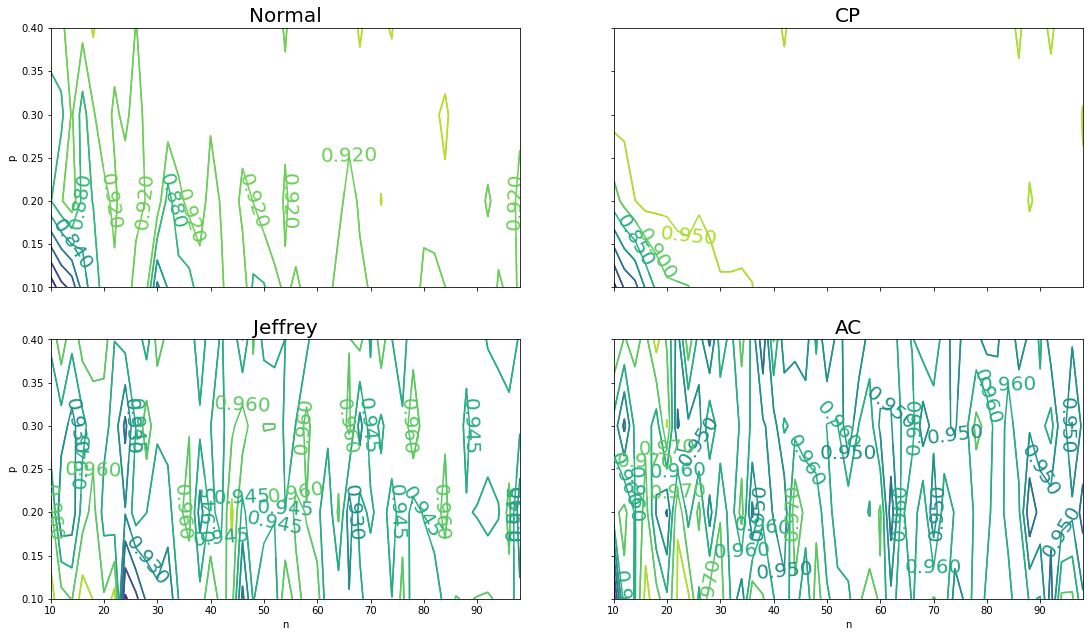

In [593]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
axs[0, 0].contour(n_values, p_values, np.array(level_normal).transpose())
axs[0, 0].set_title('Normal', fontsize=20)
axs[0, 0].clabel(axs[0, 0].contour(n_values, p_values, 
                                   np.array(level_normal).transpose()), 
                 inline=True, fontsize=20)
axs[0, 1].contour(n_values, p_values, np.array(level_cp).transpose())
axs[0, 1].set_title('CP', fontsize=20)
axs[0, 1].clabel(axs[0, 1].contour(n_values, p_values, 
                                   np.array(level_cp).transpose()), 
                 inline=True, fontsize=20)
axs[1, 0].contour(n_values, p_values, np.array(level_jeff).transpose())
axs[1, 0].set_title('Jeffrey', fontsize=20)
axs[1, 0].clabel(axs[1, 0].contour(n_values, p_values, 
                                   np.array(level_jeff).transpose()), 
                 inline=True, fontsize=20)
axs[1, 1].contour(n_values, p_values, np.array(level_ac).transpose())
axs[1, 1].set_title('AC', fontsize=20)
axs[1, 1].clabel(axs[1, 1].contour(n_values, p_values, 
                                   np.array(level_ac).transpose()), 
                 inline=True, fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='p')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Coverage probability comparison.

**b.** As part of your simulation for part a, record the widths of the associated confidence intervals. Estimate the average width of intervals produced by each method at each level of n and p and use a collection of contour plots to visualize the results. Finally, using the Clopper-Pearson method as a reference, estimate the average relative width (at each value of n and p) and display these results using one more countour plots.

In [ ]:
len_normal = []
len_cp = []
len_jeff = []
len_ac = []

for i in range(len(n_values)):
    len_normal.append([])
    len_cp.append([])
    len_jeff.append([])
    len_ac.append([])

    for j in range(len(p_values)):
        n = n_values[i]
        p = p_values[j]
        
        len_no = []
        len_c = []
        len_jf = []
        len_a = []
        
        for k in range(100):
            x = np.random.binomial(size=n, n=1, p=p)
            result_normal = ci_prop(x, level=0.95, str_fmt=None, method="Normal")
            len_no.append(result_normal['upr'] - result_normal['lwr'])
            result_cp = ci_prop(x, level=0.95, str_fmt=None, method="CP")
            len_c.append(result_cp['upr'] - result_cp['lwr'])
            result_jeff = ci_prop(x, level=0.95, str_fmt=None, method="Jeffrey")
            len_jf.append(result_jeff['upr'] - result_jeff['lwr'])
            result_ac = ci_prop(x, level=0.95, str_fmt=None, method="AC")
            len_a.append(result_ac['upr'] - result_ac['lwr'])
        
        len_normal[i].append(np.mean(len_no))
        len_cp[i].append(np.mean(len_c))
        len_jeff[i].append(np.mean(len_jf))
        len_ac[i].append(np.mean(len_a))

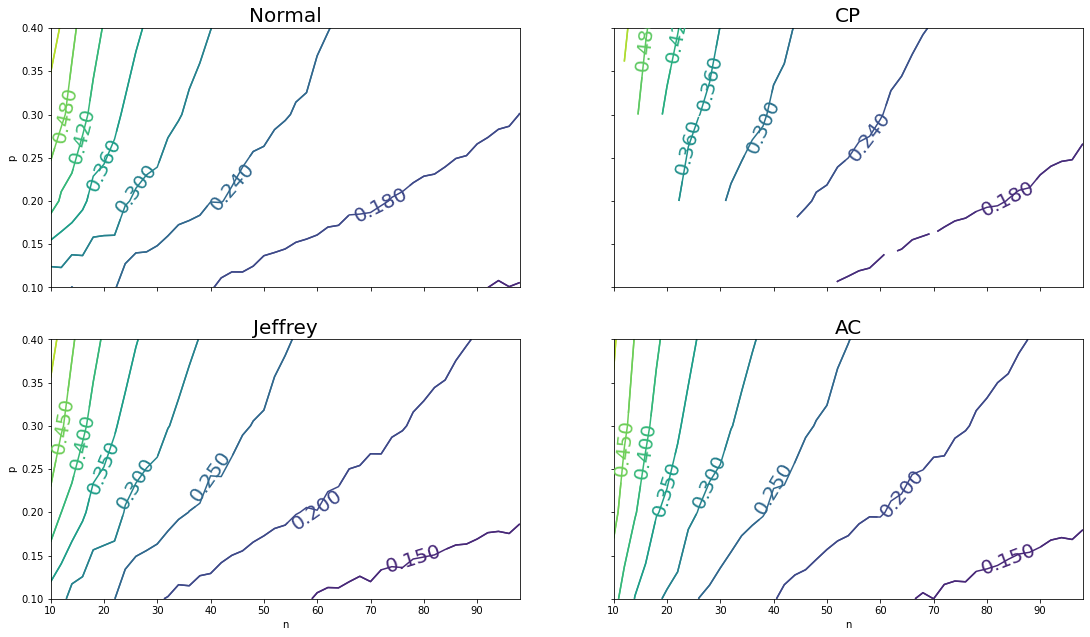

In [595]:
fig2, axs1 = plt.subplots(2, 2)
fig2.set_size_inches(18.5, 10.5)
axs1[0, 0].contour(n_values, p_values, np.array(len_normal).transpose())
axs1[0, 0].set_title('Normal', fontsize=20)
axs1[0, 0].clabel(axs1[0, 0].contour(n_values, p_values, 
                                   np.array(len_normal).transpose()), 
                 inline=True, fontsize=20)
axs1[0, 1].contour(n_values, p_values, np.array(len_cp).transpose())
axs1[0, 1].set_title('CP', fontsize=20)
axs1[0, 1].clabel(axs1[0, 1].contour(n_values, p_values, 
                                   np.array(len_cp).transpose()), 
                 inline=True, fontsize=20)
axs1[1, 0].contour(n_values, p_values, np.array(len_jeff).transpose())
axs1[1, 0].set_title('Jeffrey', fontsize=20)
axs1[1, 0].clabel(axs1[1, 0].contour(n_values, p_values, 
                                   np.array(len_jeff).transpose()), 
                 inline=True, fontsize=20)
axs1[1, 1].contour(n_values, p_values, np.array(len_ac).transpose())
axs1[1, 1].set_title('AC', fontsize=20)
axs1[1, 1].clabel(axs1[1, 1].contour(n_values, p_values, 
                                   np.array(len_ac).transpose()), 
                 inline=True, fontsize=20)

for ax in axs1.flat:
    ax.set(xlabel='n', ylabel='p')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs1.flat:
    ax.label_outer()

Absolute length comparison.

In [ ]:
rlen_normal = []
rlen_cp = []
rlen_jeff = []
rlen_ac = []

for i in range(len(n_values)):
    rlen_normal.append([])
    rlen_cp.append([])
    rlen_jeff.append([])
    rlen_ac.append([])

    for j in range(len(p_values)):
        n = n_values[i]
        p = p_values[j]
        
        rlen_no = []
        rlen_c = []
        rlen_jf = []
        rlen_a = []
        
        for k in range(100):
            x = np.random.binomial(size=n, n=1, p=p)
            result_cp = ci_prop(x, level=0.95, str_fmt=None, method="CP")
            rlen_c.append(1)
            rlen_base = result_cp['upr'] - result_cp['lwr']
            
            result_normal = ci_prop(x, level=0.95, str_fmt=None, method="Normal")
            rlen_no.append((result_normal['upr'] - result_normal['lwr'])/rlen_base)

            result_jeff = ci_prop(x, level=0.95, str_fmt=None, method="Jeffrey")
            rlen_jf.append((result_jeff['upr'] - result_jeff['lwr'])/rlen_base)
            result_ac = ci_prop(x, level=0.95, str_fmt=None, method="AC")
            rlen_a.append((result_ac['upr'] - result_ac['lwr'])/rlen_base)
        
        rlen_normal[i].append(np.mean(rlen_no))
        rlen_cp[i].append(np.mean(rlen_c))
        rlen_jeff[i].append(np.mean(rlen_jf))
        rlen_ac[i].append(np.mean(rlen_a))

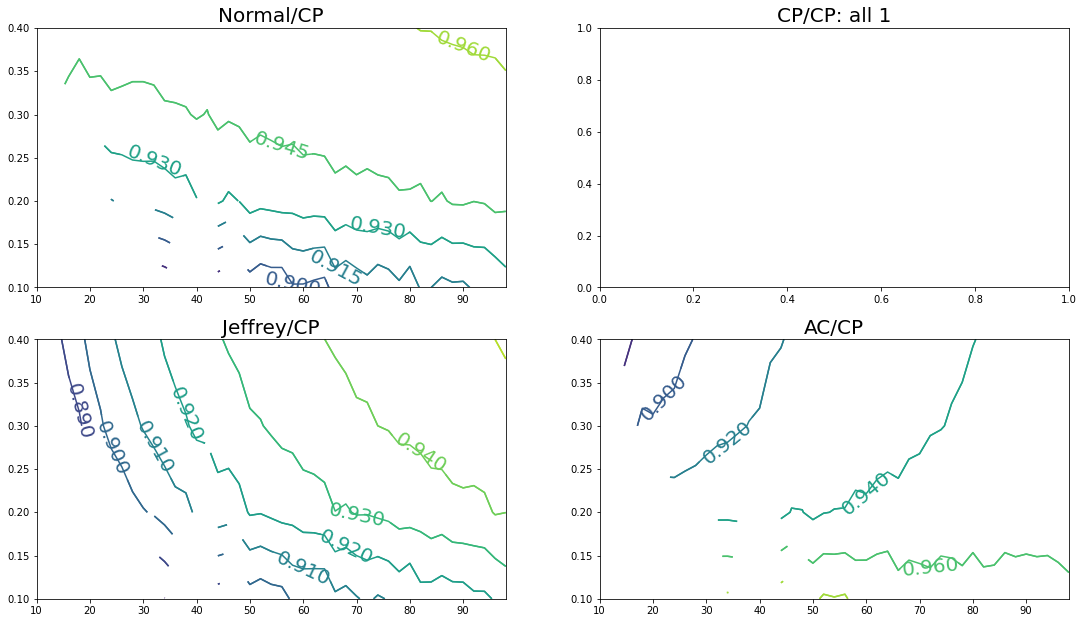

In [598]:
fig3, axs2 = plt.subplots(2, 2)
fig3.set_size_inches(18.5, 10.5)
axs2[0, 0].contour(n_values, p_values, np.array(rlen_normal).transpose())
axs2[0, 0].set_title('Normal/CP', fontsize=20)
axs2[0, 0].clabel(axs2[0, 0].contour(n_values, p_values, 
                                   np.array(rlen_normal).transpose()), 
                 inline=True, fontsize=20)
#axs2[0, 1].contour(n_values, p_values, np.array(rlen_cp).transpose())
axs2[0, 1].set_title('CP/CP: all 1', fontsize=20)
#axs2[0, 1].clabel(axs2[0, 1].contour(n_values, p_values, 
#                                   np.array(rlen_cp).transpose()), 
#                 inline=True, fontsize=20)
axs2[1, 0].contour(n_values, p_values, np.array(rlen_jeff).transpose())
axs2[1, 0].set_title('Jeffrey/CP', fontsize=20)
axs2[1, 0].clabel(axs2[1, 0].contour(n_values, p_values, 
                                   np.array(rlen_jeff).transpose()), 
                 inline=True, fontsize=20)
axs2[1, 1].contour(n_values, p_values, np.array(rlen_ac).transpose())
axs2[1, 1].set_title('AC/CP', fontsize=20)
axs2[1, 1].clabel(axs2[1, 1].contour(n_values, p_values, 
                                   np.array(rlen_ac).transpose()), 
                 inline=True, fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='n', ylabel='p')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Relative length comparison.